# Visualize the Response from the SWOT Feature Translation Service

Below I've provided some examples of how to visualize the response from the Feature Translation Service. As of now, without support from the Earthdata search client, there's no easy way to glean whether your response _is_ indeed correct. So, here I provide code that takes a response from the SWOT Feature Translation Service, and graphs the associated points and linestrings.

In [1]:
%%capture

import sys
!{sys.executable} -m pip install geopandas pandas requests shapely numpy

In [2]:
from shapely.geometry import box, Polygon, Point, LineString
import matplotlib.pyplot as plt 
import geopandas as gpd
import pandas as pd
import numpy as np
import requests
import json
import math

## Function for Visualization

Below is a function I've created specifically to visualize the output of the SWOT Feature Translation Service. 

In [3]:
def visualize(fts_response):
    
    final_df = pd.DataFrame()
    for element in fts_response['results']:
        swot_feature_id = element
        geometries = fts_response['results'][element].split("&")

        for geometry in geometries:
            pair = geometry.split("=")
            
            if pair[0] == "point":
                geoseries = gpd.GeoSeries(Point([float(e) for e in pair[1].split(",")]))
            elif pair[0] == "line":
                geoseries = gpd.GeoSeries(LineString([float[e] for e in pair[1].split(",")]))
                
            final_df = pd.concat([final_df, geoseries])
    
    final_df.columns = ['geometry']
    final_gdf = gpd.GeoDataFrame(final_df, geometry = 'geometry') 
    final_gdf.plot(figsize=(10,10))
   
    plt.title("SWOT Feature ID: " +  swot_feature_id)
    plt.show()

## Query SWOT Feature Translation Service

Below I've queried the SWOT portion of the Feature Translation Service using one of the four examples from the previous _SWOT Feature Translation Service Examples_ notebook.

In [4]:
###################

# Mimicing a user querying partial matches with SWOT Feature ID "75411400010000"

SWOT_FEATURE_ID = "75411400010"
EXACT = False

###################

# Query Feature Translation Service and parse JSON response
r = requests.get("https://g6zl7z2x7j.execute-api.us-west-2.amazonaws.com/prod/swot/{}?exact={}".format(SWOT_FEATURE_ID, EXACT))

# Load response from FTS
response = json.loads(r.text)

# Print all elements in SWOT database that partially match SWOT Feature ID "75411400010000"
print(json.dumps(response, indent = 4))

{
    "status": "200 OK",
    "hits": 4341,
    "time": "16.479 ms.",
    "search on": {
        "parameter": "SWOT Feature ID",
        "exact": false
    },
    "results": {
        "75411400010": "point=-83.62575151546879,9.252305471126416&point=-83.62575352733344,9.252576533363468&point=-83.62564640094489,9.252848395107943&point=-83.62553927444125,9.253120256862395&point=-83.62543214782254,9.253392118626815&point=-83.62527045178793,9.253664380130763&point=-83.62510875554258,9.253936641627057&point=-83.62489208736692,9.254155090331341&point=-83.62467461434254,9.254265113998752&point=-83.62440257170697,9.25437553719889&point=-83.6241301266395,9.254431747726603&point=-83.62385727925785,9.254433745546725&point=-83.62358483394536,9.254489955695641&point=-83.6233127905843,9.254600378208506&point=-83.62304034494834,9.254656588002048&point=-83.62276830118776,9.254767010182778&point=-83.62249625720905,9.254877432203202&point=-83.62222381106827,9.254933641469501&point=-83.62195096288316,9.25

## Visualization

I can take that response and pass it to the _visualize()_ function created above. 

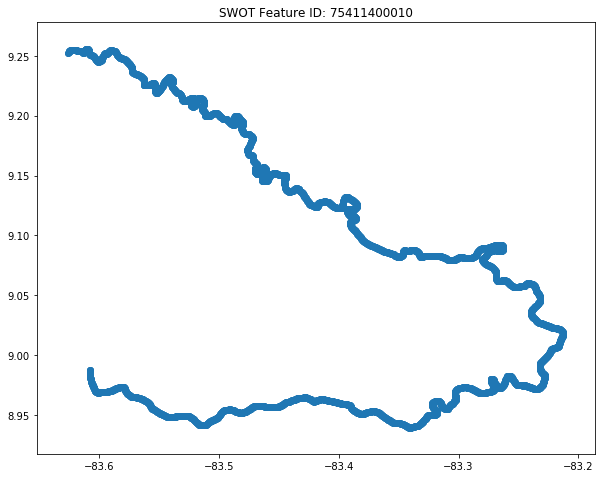

In [5]:
visualize(response)